###   Project 3: Projective transformation
    Li Wang 18461271
    

###   1.(a)specify a homogeneous 3$\times$3 matrix H


In [ ]:
import numpy as np
H=np.zeros(shape=(3,3))

H[0][0]=s*np.cos(θ)
H[0][1]=-s*np.sin(θ)
H[0][2]=s*(-np.cos(θ)*x_0+np.sin(θ)*y_0+x_0)
H[1][0]=s*np.sin(θ)
H[1][1]=s*np.cos(θ)
H[1][2]=s*(-np.sin(θ)*x_0-np.cos(θ)*y_0+y_0)
H[2][0]=H[2][1]=0
H[2][2]=1

In [ ]:
H=[s*cosθ  -s*sinθ   s*(cos(θ)*x_0-sin(θ)*y_0+x_0);
   s*sinθ   s*cosθ   s*(cos(θ)*y_0+sin(θ)*x_0+y_0);
      0        0                  1               ];


### (b) Transform a colour image using the above homogeneous matrix H
$$x'=H x$$ 

where $x'$ is the output image coordinates, $x$ is the input image coordinates .

In [9]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math 
from PIL import Image
import os

def applyhomography(A,s,θ):
    A=np.float64(A)
    m,n,c=A.shape
    x_0,y_0=n/2,m/2
    
    H=np.zeros(shape=(3,3))

    H[0][0]=s*np.cos(θ)
    H[0][1]=-s*np.sin(θ)
    H[0][2]=s*(-np.cos(θ)*x_0+np.sin(θ)*y_0+x_0)
    H[1][0]=s*np.sin(θ)
    H[1][1]=s*np.cos(θ)
    H[1][2]=s*(-np.sin(θ)*x_0-np.cos(θ)*y_0+y_0)
    H[2][0]=H[2][1]=0
    H[2][2]=1
    
    p1=np.dot(H,[0,0,1]);p1=p1/p1[2]
    p2=np.dot(H,[n-1,0,1]);p2=p2/p2[2]
    p3=np.dot(H,[0,m-1,1]);p3=p3/p3[2]
    p4=np.dot(H,[n-1,m-1,1]);p4=p4/p4[2]
    minx=math.floor(min([p1[0],p2[0],p3[0],p4[0]]))
    maxx= math.ceil(max([p1[0],p2[0],p3[0],p4[0]]))
    miny=math.floor(min([p1[1],p2[1],p3[1],p4[1]]))
    maxy= math.ceil(max([p1[1],p2[1],p3[1],p4[1]]))
    
    nn=int(maxx-minx+1)
    mm=int(maxy-miny+1)
    
    #B=Image.new("RGB",(mm,nn),"white")   #create a new image
    B=np.zeros((mm,nn,c))+255
    H_inverse=np.linalg.inv(H)
    
    for x in range(nn):
        for y in range(mm):
            p=[x+minx-1,y+miny-1,1]
            pp=np.dot(H_inverse,p)
            xp=pp[0]/pp[2]
            yp=pp[1]/pp[2]
            
            xpf=math.floor(xp);xpc=xpf+1
            ypf=math.floor(yp);ypc=ypf+1
            if xpf>=0 and xpc<n and ypf>=0 and ypc<m:
                B[y,x,:]=(xpc-xp)*(ypc-yp)*A[ypf,xpf,:]+(xpc-xp)*(yp-ypf)*A[ypc,xpf,:]+(xp-xpf)*(ypc-yp)*A[ypf,xpc,:]+(xp-xpf)*(yp-ypf)*A[ypc,xpc,:]
    B=np.uint8(B)        
    
    return B


### Question 1(b) image transformation ,X'=HX

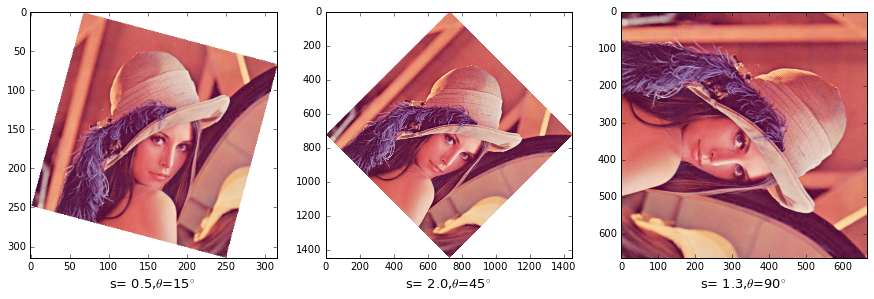

In [11]:
path="/home/li/Desktop/_computation/computer_vision/"
os.chdir(path)
#A=np.array(Image.open("exp1.png"),dtype="float64")
S=[0.5, 2.0, 1.3]
θ=[ 15,  45,  90]
c=np.array(Image.open("exp1.png"))
c1=[applyhomography(c,i,j*math.pi/180) for i,j in zip(S,θ)]

plt.figure(figsize=(15,5))

for m,n in enumerate(c1):
    plt.subplot(1,3,m+1)
    plt.imshow(n)
    plt.xlabel(r"s= %.1f,$\theta$=%d$^{\circ}$ "%(S[m],θ[m]),fontsize=13)


### Question 1(c)  
1.The center of the image is the center of projection, the origin of  rays, it could be considerd $(x_0,y_0)=(0,0)$, therefore, the different values of s and $\theta$ have no effect on the output image.



2.One of the biggest difference between image coordinates and normal coordinates is the direction of Y-axis, in the image coordinates, Y-axis points down, while nomal Y-axis points in the up direction, so the angle between the X-axis and Y-axis image coordinates acts like -$\theta$, that is the reason the rotation is clockwise eventhough the R suggests counterclockwise.

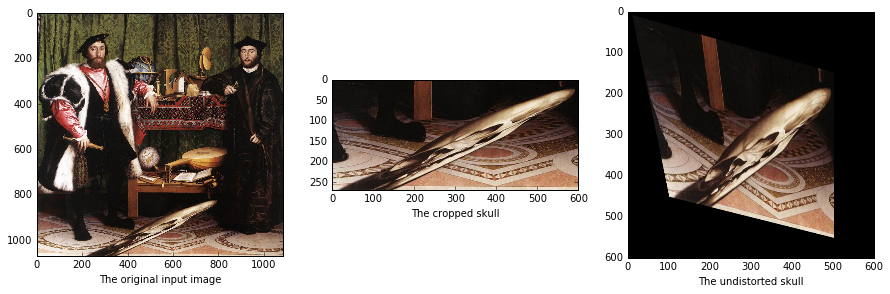

In [33]:
path="/home/li/Desktop/_computation/computer_vision/project3/project3_material"
os.chdir(path)
img=np.array(Image.open("ambassadors.jpg"))
skull=img[800:1069,200:800,:]
m,n,c=skull.shape
sct=np.float32([[0,0],[0,m-1],[n-1,0],[n-1,m-1]])
dct=np.float32([[10,10],[100,450],[500,150],[500,550]])
H= cv2.getPerspectiveTransform(sct,dct)
correct = cv2.warpPerspective(skull,H,(n,n))
imgs=[img,skull,correct]
label=["The original input image","The cropped skull","The undistorted skull"]
plt.figure(figsize=(15,5))
for i,j in enumerate(imgs):
    plt.subplot(1,3,i+1)
    plt.imshow(j)
    plt.xlabel(label[i])

### Question 3(a) Proof the equations 5.34 and 5.35 in the lecture notes.

(-0.5, 516.5, 644.5, -0.5)

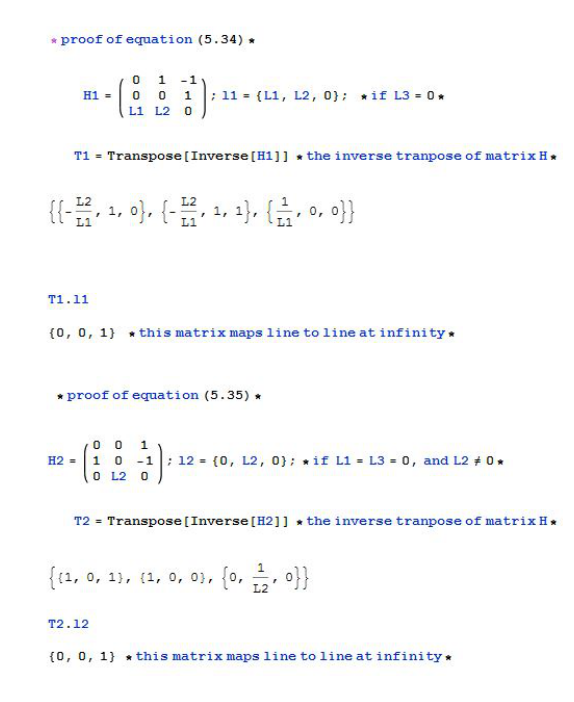

In [37]:
path="/home/li/Desktop/_computation/computer_vision"
os.chdir(path)
plt.figure(figsize=(12,12))
proof=np.array(Image.open("map_infinity.JPG"))
plt.imshow(proof)
plt.axis("off")

##  3(b)  Recoving affine properties steps:
1. First, we need to detect two pairs of parallel lines in the image (l1,l2,l3,l4).(They should be parallel in real world plane, it is not parallel in the image).
   choose four candidate points, and caculate four lines : l1,l2,l3,l4.
2. Caculate the intersection point of each pair, denoted as x=l1$\times$l2 and x'=l3$\times$l4 .
3. Use the cross product of two points to construct a line, this is the line of infinity $l_{\infty}$ = x$\times$ x'  in we are looking for.
4. Map the line  $l_{\infty}$  to [0,0,1]$^T$ using matrix H , the rectified image recovers its parallel property ,even it was stillaffine transformed,

In [10]:
path="/home/li/Desktop/_computation/computer_vision/project3/project3_material"
os.chdir(path)
img=np.array(Image.open("building.jpg"))
resize=applyhomography(img,3,0*math.pi/180) #upscale the image to manually define four corners
#plt.figure(figsize=(20,10))
#plt.imshow(resize)

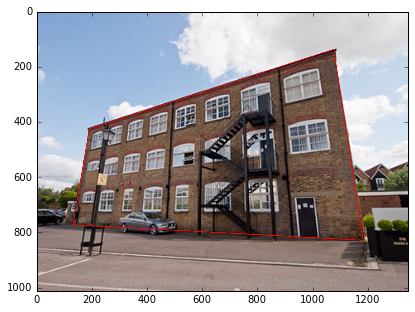

In [11]:
a=(189,425)#left up corner of the building
b=(1075,138)# right up corner
c=(1181,828)#right down corner
d=(130,772)#left down corner
l1=cv2.line(resize,a,b,(255,0,0),2,8)
l2=cv2.line(resize,d,c,(255,0,0),2,8)
l3=cv2.line(resize,b,c,(255,0,0),2,8)
l4=cv2.line(resize,a,d,(255,0,0),2,8)
plt.figure(figsize=(10,5))
plt.imshow(l1)
plt.imshow(l2)
plt.imshow(l3)
plt.imshow(l4)

In [18]:
a1=[189,425,1] #left up corner of the building
b1=[1075,138,1] # right up corner
c1=[1181,828,1] #right down corner
d1=[130,772,1] #left down corner
l1=np.cross(a1,b1)
l2=np.cross(d1,c1)
l3=np.cross(b1,c1)
l4=np.cross(a1,d1)
x=np.cross(l1,l2)
xx=np.cross(l3,l4)
l_infy=np.cross(x,xx)
l_infy=l_infy/l_infy[2]

print(l_infy)

[ 0.00240764  0.00107462  1.        ]


In [19]:

def recoveraffine(A):
    A=np.float64(A)
    m,n,c=A.shape
    x_0,y_0=n/2,m/2
    
    H=np.zeros(shape=(3,3))

    H[0][0]=1
    H[0][1]=0
    H[0][2]=0
    H[1][0]=0
    H[1][1]=1
    H[1][2]=0
    H[2][0]=l_infy[0]
    H[2][1]=l_infy[1]
    H[2][2]=l_infy[2]
    
    p1=np.dot(H,[0,0,1]);p1=p1/p1[2]
    p2=np.dot(H,[n-1,0,1]);p2=p2/p2[2]
    p3=np.dot(H,[0,m-1,1]);p3=p3/p3[2]
    p4=np.dot(H,[n-1,m-1,1]);p4=p4/p4[2]
    minx=math.floor(min([p1[0],p2[0],p3[0],p4[0]]))
    maxx= math.ceil(max([p1[0],p2[0],p3[0],p4[0]]))
    miny=math.floor(min([p1[1],p2[1],p3[1],p4[1]]))
    maxy= math.ceil(max([p1[1],p2[1],p3[1],p4[1]]))
    
    
    nn=int(maxx-minx+1)
    mm=int(maxy-miny+1)
    
    #B=Image.new("RGB",(mm,nn),"white")   #create a new image
    B=np.zeros((mm,nn,c))+255
    H_inverse=np.linalg.inv(H)
    
    for x in range(nn):
        for y in range(mm):
            p=[x+minx-1,y+miny-1,1]
            pp=np.dot(H_inverse,p)
            xp=pp[0]/pp[2]
            yp=pp[1]/pp[2]
            
            xpf=math.floor(xp);xpc=xpf+1
            ypf=math.floor(yp);ypc=ypf+1
            if xpf>=0 and xpc<n and ypf>=0 and ypc<m:
                B[y,x,:]=(xpc-xp)*(ypc-yp)*A[ypf,xpf,:]+(xpc-xp)*(yp-ypf)*A[ypc,xpf,:]+(xp-xpf)*(ypc-yp)*A[ypf,xpc,:]+(xp-xpf)*(yp-ypf)*A[ypc,xpc,:]
    B=np.uint8(B)        
    
    return B

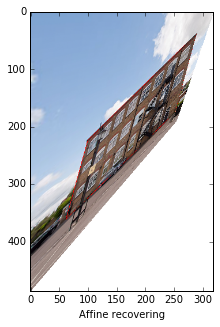

In [20]:
plt.figure(figsize=(10,5))
recorve=recoveraffine(resize)
plt.imshow(recorve)
plt.xlabel("Affine recovering")

### 4. plot all the data points , using least square methods to fit ,using RANSAC method to fit.

/home/li/pythoneee/lib/python3.5/site-packages/skimage/measure/fit.py:57: skimage_deprecation: `LineModel` is deprecated, use `LineModelND` instead.
  warn(skimage_deprecation('`LineModel` is deprecated, '


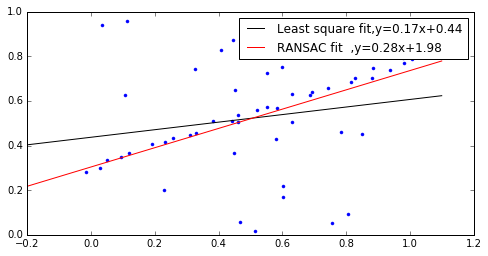

In [133]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from skimage.measure import LineModelND, ransac,LineModel
import os

path="/home/li/Desktop/_computation/computer_vision/project3/project3_material"
os.chdir(path)
data = np.loadtxt("linedata.txt")

x =np.array( data[:,0])
y =np.array( data[:,1])
data1=np.column_stack([x,y])

X=np.arange(-0.2,1.2,0.1)
A = np.vstack([x, np.ones(len(x))]).T   

a, b = np.linalg.lstsq(A, y)[0]    # y=A*parameters

linear_y=a*X+b
model_robust,inliers = ransac(data,LineModel, min_samples=2,residual_threshold=10, max_trials=30)
#outliers = (inliers == False)
#outliers=np.logical_not(inliers)
line_y_robust = model_robust.predict_y(X)   #make predictions
m,n = model_robust.params  #get the ransac coefficients
#plt.plot(data[inliers,0], data[inliers,1],"b.", alpha=0.6,label='Inlier data')
#plt.plot(data[outliers,0], data[outliers,1],"b.", alpha=0.6,label='Outlier data')

plt.figure(figsize=(8,4))
plt.plot(x,y,"b.")
plt.plot(X, linear_y, '-k', label='Least square fit,y=%.2fx+%.2f'%(a,b))
plt.plot(X,line_y_robust,"-r", label='RANSAC fit  ,y=%.2fx+%.2f'%(m,n))
#plt.xlabel("RANSAC method, only using inliers for estimation")
plt.legend(loc=1)


###   Comments: Least square estimation use all the data to fit a model, while RANSAC only counts the inlier data.

### Question 5(a) Feature matching

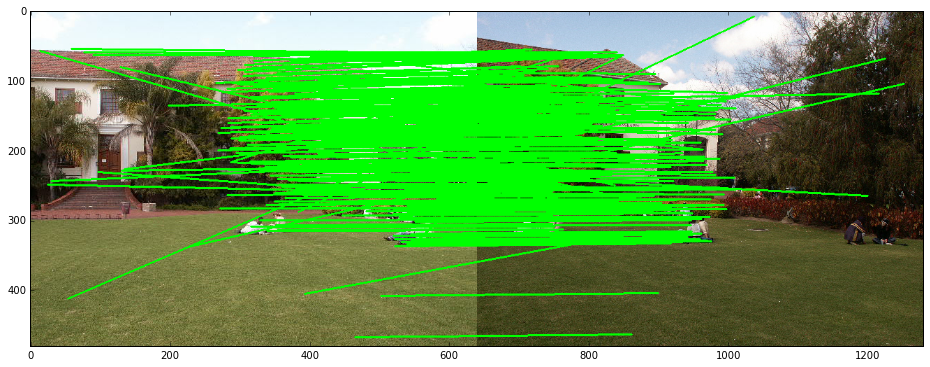

In [134]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

path = "/home/li/Desktop/_computation/computer_vision/project3/project3_material"
os.chdir(path)

data = np.loadtxt("peroldsift12.txt")
plt.figure(figsize=(16,8))

x1 = data[:,0] #get img1 x coordinates
y1 = data[:,1] #get img1 y coordinates 
x2 = data[:,2] 
y2 = data[:,3]
#img1=cv2.imread('perold1.jpg',0) # original image (x1,y1)
#img2=cv2.imread("perold2.jpg",0) # target image (x2,y2)
img1=np.array(Image.open("perold1.jpg"))
img2=np.array(Image.open("perold2.jpg"))

h1,w1,c1 = img1.shape
h2,w2,c2 = img2.shape

x_1=[]
x_2=[]
for i,j in zip(x1,y1):
    i,j=int(i),int(j)
    x_1.append((i,j))
for m,n in zip(x2,y2):
    m,n=int(m),int(n)
    x_2.append((m+w1,n))

vis=np.zeros((max(h1,h2),w1+w2,c1),dtype="uint8") #create a image
vis[0:h1,0:w1] = img1
vis[0:h2,w1:] = img2

for i,j in zip(x_1,x_2):
    match=cv2.line(vis,i,j,(0,255,0),2,8) 
#plt.imshow(match,cmap=plt.cm.gray) 
plt.imshow(match) 

###   Comments: It is easy to see that there are quite a few incorrect matches between the two images, if we use the matched features detected by SIFT to caculate Homography matrix, it would be confusing to choose the 4 correspondences, the resulted matrix H is not  good choice, since there are incorrect matches are involved, therefore, an adaptive method to filter these outliers is demanding.

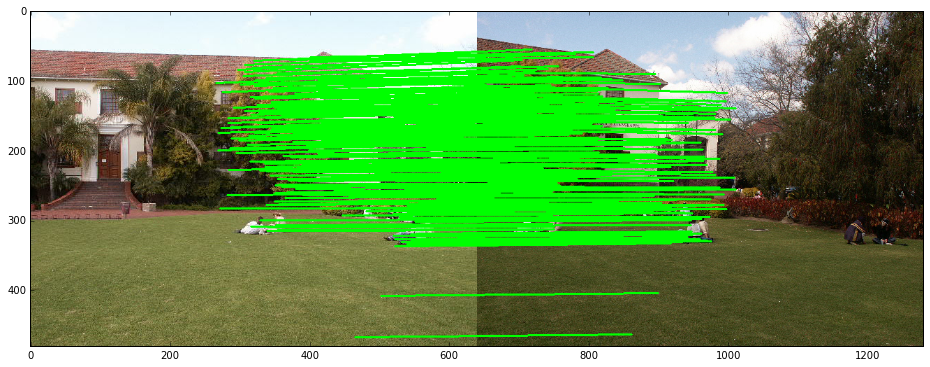

In [147]:
plt.figure(figsize=(16,8))

p=[]
pp=[]
for i,j in zip(x1,y1):
    i,j=np.float32(i),np.float32(j)
    p.append((i,j))
for m,n in zip(x2,y2):
    m,n=np.float32(m),np.float32(n)
    pp.append((m+w1,n))

p=np.array(p)  #keypoints coordinates in imag1
pp=np.array(pp) #keypoints coordinates in imag2

H,status = cv2.findHomography(p,pp,cv2.RANSAC,3.0) #using RANSAC to caculate  H and status of matched point, Imag2= H*Imag1

H1,status1 = cv2.findHomography(pp,p,cv2.RANSAC,3.0) # Image 1 = H * img2

h1,w1,c1 = img1.shape
h2,w2,c2 = img2.shape

x_1=[]
x_2=[]
for i,j in zip(x1,y1):
    i,j=int(i),int(j)
    x_1.append((i,j))
for m,n in zip(x2,y2):
    m,n=int(m),int(n)
    x_2.append((m+w1,n))

vis=np.zeros((max(h1,h2),w1+w2,c1),dtype="uint8")
vis[0:h1,0:w1] = img1
vis[0:h2,w1:] = img2
match=zip(x_1,x_2)
for ((i,j),s) in zip(match,status):
    if s==1:
        line=cv2.line(vis,i,j,(0,255,0),2,8) 

plt.imshow(line)       

### Comment: the above images display an better match because the method RANSAC is employed, by only consifering the inliers correspondences, this estimated Homography matrix is more effective than any other caculated matrices.

In [151]:
import math
def undistort(A,A2,H):
    A=np.float64(A)
    m,n,c=A.shape
    x_0,y_0=n/2,m/2
    
    
    p1=np.dot(H,[0,0,1]);p1=p1/p1[2]
    p2=np.dot(H,[n-1,0,1]);p2=p2/p2[2]
    p3=np.dot(H,[0,m-1,1]);p3=p3/p3[2]
    p4=np.dot(H,[n-1,m-1,1]);p4=p4/p4[2]
    minx=math.floor(min([p1[0],p2[0],p3[0],p4[0]]))
    maxx= math.ceil(max([p1[0],p2[0],p3[0],p4[0]]))
    miny=math.floor(min([p1[1],p2[1],p3[1],p4[1]]))
    maxy= math.ceil(max([p1[1],p2[1],p3[1],p4[1]]))
    
    
    nn=int(maxx-minx+1)
    mm=int(maxy-miny+1)
    m2,n2,c=A2.shape
    height=max(mm,m2)
    weidth=nn+n2
    #B=Image.new("RGB",(mm,nn),"white")   #create a new image
    B=np.zeros((mm,nn,c))+255
    H_inverse=np.linalg.inv(H)
    
    for x in range(nn):
        for y in range(mm):
            p=[x+minx-1,y+miny-1,1]
            pp=np.dot(H_inverse,p)
            xp=pp[0]/pp[2]
            yp=pp[1]/pp[2]
            
            xpf=math.floor(xp);xpc=xpf+1
            ypf=math.floor(yp);ypc=ypf+1
            if xpf>=0 and xpc<n and ypf>=0 and ypc<m:
                B[y,x,:]=(xpc-xp)*(ypc-yp)*A[ypf,xpf,:]+(xpc-xp)*(yp-ypf)*A[ypc,xpf,:]+(xp-xpf)*(ypc-yp)*A[ypf,xpc,:]+(xp-xpf)*(yp-ypf)*A[ypc,xpc,:]
    B=np.uint8(B)        
    stitch=np.zeros((height,weidth,c),dtype="uint8")+255
    stitch[0:mm,:nn,:]=B
    stitch[0:m2,nn:,:]=A2
    return stitch


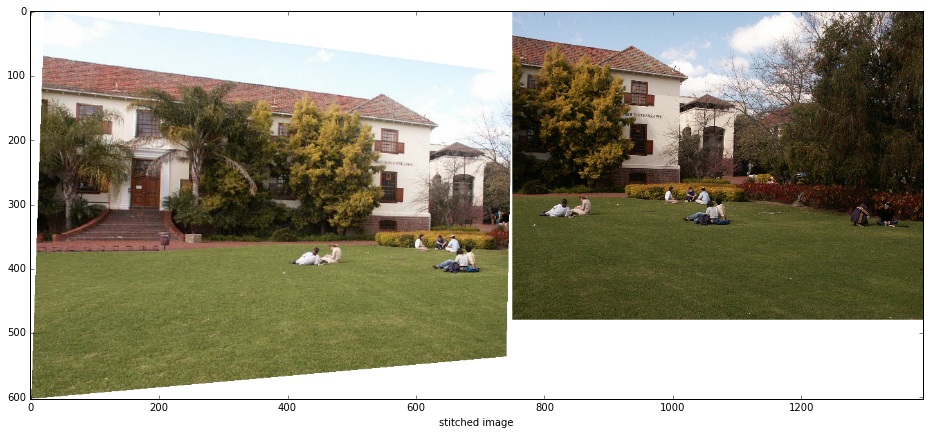

In [152]:
plt.figure(figsize=(16,8))
img1=np.array(Image.open("perold1.jpg"))
img2=np.array(Image.open("perold2.jpg"))
correct=undistort(img1,img2,H)
plt.imshow(correct)
plt.xlabel("stitched image")

### comment: some boundary problem involved.

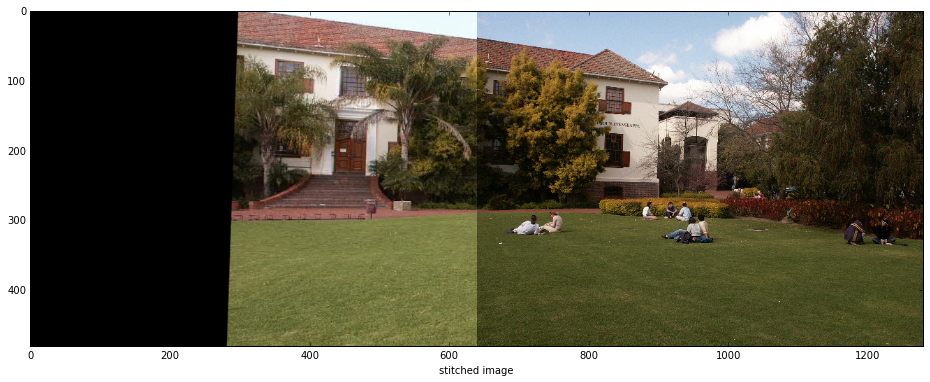

In [50]:
plt.figure(figsize=(16,8))
img1=np.array(Image.open("perold1.jpg"))
img2=np.array(Image.open("perold2.jpg"))

stitch=cv2.warpPerspective(img1,H,(w1+w2,max(h1,h2)),flags=1)
stitch[0:h2,w1:]=img2
plt.imshow(stitch)
plt.xlabel("stitched image")

In [49]:
#plt.figure(figsize=(16,8))
imout=cv2.warpPerspective(img2,H1,(w1+w2,max(h1,h2)),flags=1)  # img2 is the source image
#imout[0:h1,0:w1]=img1
#plt.imshow(imout,cmap=plt.cm.gray)